# Actividad de Clustering en Equipo: Análisis y Recomendaciones para Kueski<br>
<br>

**Objetivo:** Realizar un análisis de clustering de los clientes de Kueski utilizando K-means, interpretar los resultados y proponer estrategias de negocio basadas en los hallazgos.<br>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HesusG/course-itesm-data-mining/blob/main/1Clustering/clase_clustering.ipynb)


## 1. Análisis de Datos (Trabajo Conjunto)<br>

<br>

### 1.1. Importación de Librerías<br>

<br>

Comenzamos importando las librerías necesarias para el análisis de datos y visualización.<br>
<br>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set_style('darkgrid')
sns.set_palette('husl')

%% [markdown]<br>
### 1.2. Carga de Datos<br>
<br>
Cargamos el archivo CSV que contiene los datos de los clientes de Kueski.<br>
<br>
%%

In [4]:
archivo = 'https://raw.githubusercontent.com/HesusG/course-itesm-data-mining/refs/heads/main/1Clustering/data/Tarea1Creditos.csv'
customer_data = pd.read_csv(archivo)

%% [markdown]<br>
### 1.3. Exploración Inicial de los Datos<br>
<br>
Inspeccionamos la forma del conjunto de datos, las columnas presentes y realizamos una descripción estadística básica.<br>
<br>
%%<br>
Inspeccionar la forma de los datos

In [5]:
print("Forma del DataFrame:", customer_data.shape)

Forma del DataFrame: (200, 8)


%%<br>
Acceder a las columnas

In [6]:
print("Columnas del DataFrame:", customer_data.columns)

Columnas del DataFrame: Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Loan Ammount', 'LoanID', 'Device', 'Location'],
      dtype='object')


%%<br>
Histograma de 'Spending Score (1-100)'

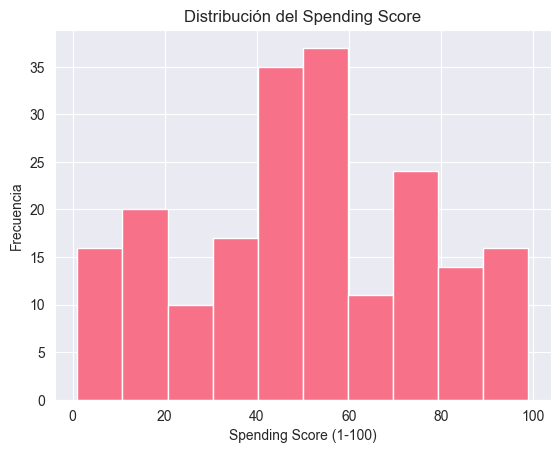

In [7]:
customer_data['Spending Score (1-100)'].hist()
plt.title('Distribución del Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frecuencia')
plt.show()

%%<br>
Descripción estadística

In [8]:
print(customer_data.describe().T)

                        count     mean         std    min      25%     50%  \
Age                     200.0    39.03   13.870148   18.0    28.75    36.0   
Annual Income (k$)      200.0    60.56   26.264721   15.0    41.50    61.5   
Spending Score (1-100)  200.0    50.20   25.823522    1.0    34.75    50.0   
Loan Ammount            200.0  1832.00  560.644819  150.0  1500.00  1700.0   

                           75%     max  
Age                       49.0    70.0  
Annual Income (k$)        78.0   137.0  
Spending Score (1-100)    73.0    99.0  
Loan Ammount            1900.0  3500.0  


%%<br>
Histograma de 'Annual Income (k$)'

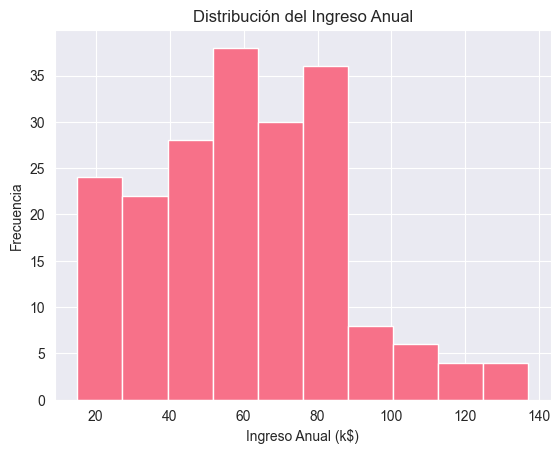

In [9]:
customer_data['Annual Income (k$)'].hist()
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

%%<br>
Información del DataFrame

In [10]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Loan Ammount            200 non-null    int64 
 5   LoanID                  200 non-null    object
 6   Device                  200 non-null    object
 7   Location                200 non-null    object
dtypes: int64(4), object(4)
memory usage: 12.6+ KB
None


%%<br>
Primeras 10 filas del DataFrame

In [11]:
print(customer_data.head(10))

    Genre  Age  Annual Income (k$)  Spending Score (1-100)  Loan Ammount  \
0    Male   40                  15                      39          1200   
1    Male   21                  15                      81          1100   
2  Female   43                  16                       6          1200   
3  Female   23                  16                      77          1300   
4  Female   50                  17                      40          1400   
5  Female   22                  17                      76          1400   
6  Female   40                  18                       6          1500   
7  Female   23                  18                      94          1500   
8    Male   55                  19                       3          1500   
9  Female   30                  19                      72          1500   

       LoanID   Device Location  
0  13e3dfdf97  Android    Rural  
1  0880726ca9  Android    Rural  
2  b3e95e003a  Android    Rural  
3  6da587e76a  Android    R

%%<br>
Valores únicos en la columna 'Genre'

In [12]:
print("Valores únicos en 'Genre':", customer_data['Genre'].unique())

Valores únicos en 'Genre': ['Male' 'Female']


%%<br>
Conteo de valores en 'Genre'

In [13]:
print(customer_data['Genre'].value_counts(normalize=True))

Female    0.56
Male      0.44
Name: Genre, dtype: float64


%% [markdown]<br>
### 1.4. Preprocesamiento de Datos<br>
<br>
Convertimos las variables categóricas en numéricas para facilitar el análisis de clustering.<br>
<br>
%%<br>
Diccionario de reemplazo

In [14]:
replace_dict = {
    'Android' : 0,
    'Ios' : 1,
    'Rural' : 0,
    'Urban' : 1,
    'Male'  : 0,
    'Female' : 1
}

Aplicar el reemplazo

In [15]:
customer_data.replace(replace_dict, inplace=True)

%% [markdown]<br>
## 2. Implementación de K-means<br>
<br>
A continuación, implementamos el algoritmo K-means utilizando Scikit-Learn para realizar el clustering de los clientes.<br>
<br>
**Nota:** Es importante escalar las características antes de aplicar K-means para asegurar que todas las variables contribuyan equitativamente al clustering.

%%

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Seleccionar las características para el clustering

In [17]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

Escalado de las características

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Definir el modelo K-means

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)

Ajustar el modelo

In [20]:
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

Obtener las etiquetas de los clusters

In [21]:
labels = kmeans.labels_

%% [markdown]<br>
### 2.1. Visualización de los Clusters<br>
<br>
Representamos gráficamente los clusters obtenidos para visualizar la segmentación de los clientes.<br>
<br>
%%<br>
Agregar las etiquetas de los clusters al DataFrame original

In [22]:
customer_data['Cluster'] = labels

Gráfico de dispersión de los clusters

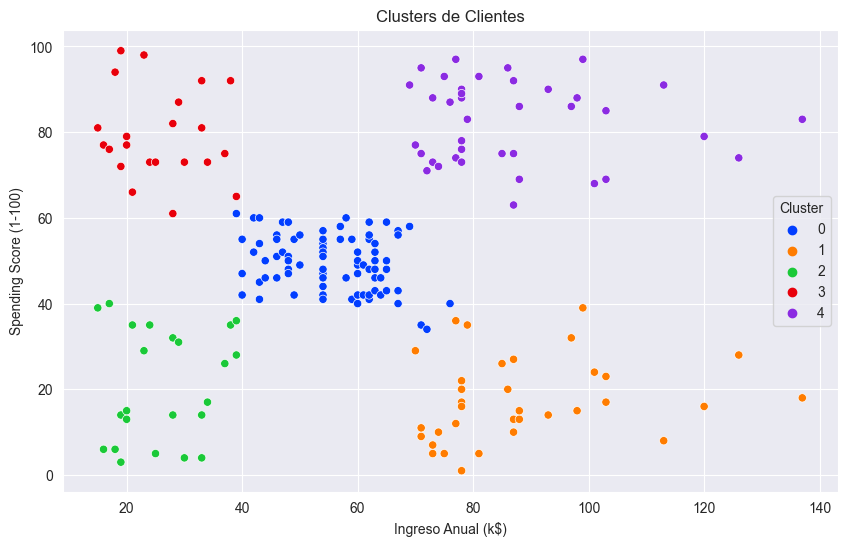

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='bright',
                data=customer_data)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

%% [markdown]<br>
## 3. Interpretación de Resultados (Trabajo Conjunto)<br>
<br>
Analizamos las características de cada cluster para identificar patrones y tendencias en los datos.<br>
<br>
%%<br>
Añadir las etiquetas de los clusters al DataFrame

In [24]:
cluster_results = customer_data.copy()
cluster_results['Cluster Labels'] = labels

%%<br>
Filtrar un cluster específico (ejemplo: Cluster 4)

In [25]:
cluster_4 = cluster_results.loc[cluster_results['Cluster Labels'] == 4]
print(cluster_4.describe())

           Genre        Age  Annual Income (k$)  Spending Score (1-100)  \
count  39.000000  39.000000           39.000000               39.000000   
mean    0.538462  31.794872           86.538462               82.128205   
std     0.505035   3.635928           16.312485                9.364489   
min     0.000000  26.000000           69.000000               63.000000   
25%     0.000000  29.500000           75.500000               74.500000   
50%     1.000000  31.000000           79.000000               83.000000   
75%     1.000000  33.500000           95.000000               90.000000   
max     1.000000  40.000000          137.000000               97.000000   

       Loan Ammount     Device  Location  Cluster  Cluster Labels  
count     39.000000  39.000000      39.0     39.0            39.0  
mean    1451.282051   0.179487       1.0      4.0             4.0  
std      321.691087   0.388776       0.0      0.0             0.0  
min      150.000000   0.000000       1.0      4.0   

%%<br>
Histograma de 'Age' en el Cluster 4

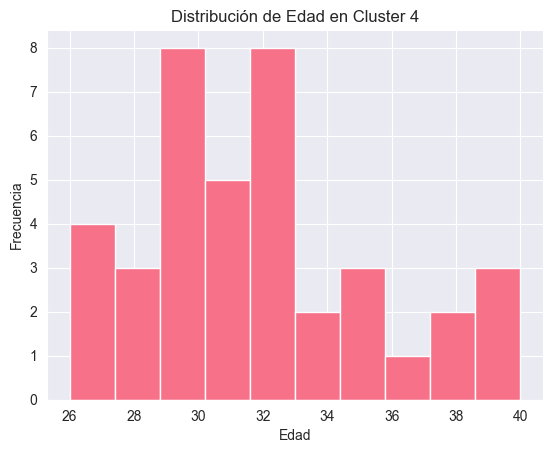

In [26]:
cluster_4['Age'].hist()
plt.title('Distribución de Edad en Cluster 4')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

%%<br>
Histograma de 'Loan Ammount' en el Cluster 4

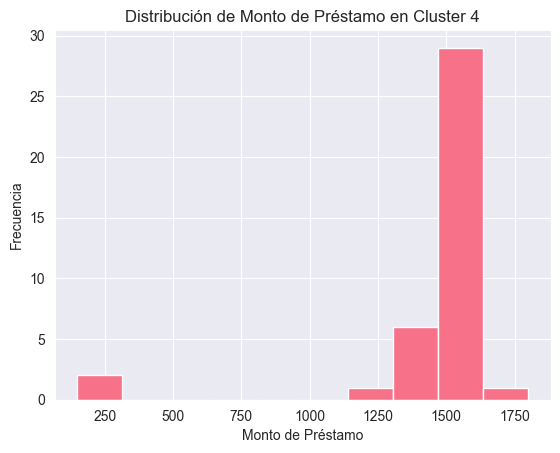

In [27]:
cluster_4['Loan Ammount'].hist()
plt.title('Distribución de Monto de Préstamo en Cluster 4')
plt.xlabel('Monto de Préstamo')
plt.ylabel('Frecuencia')
plt.show()

%%<br>
Boxplot de 'Annual Income (k$)' por Cluster y Género

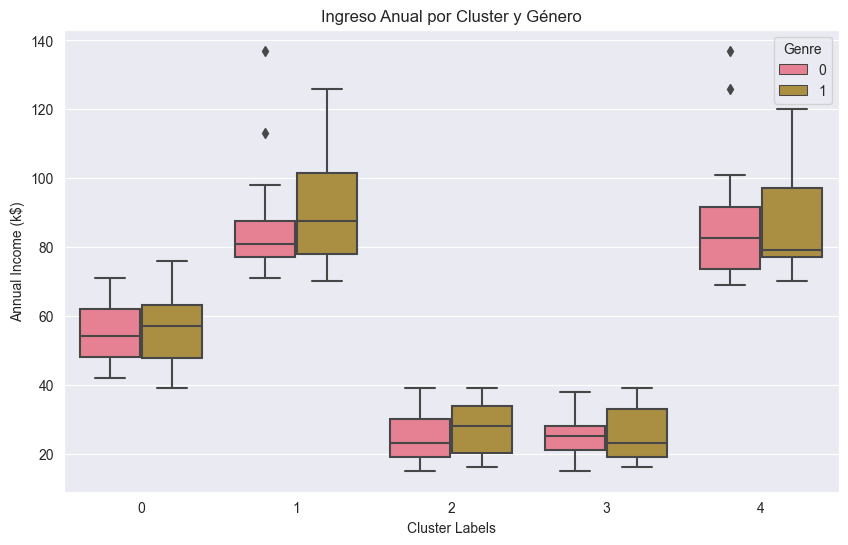

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Annual Income (k$)", hue="Genre")
plt.title('Ingreso Anual por Cluster y Género')
plt.show()

%%<br>
Boxplot de 'Spending Score (1-100)' por Cluster

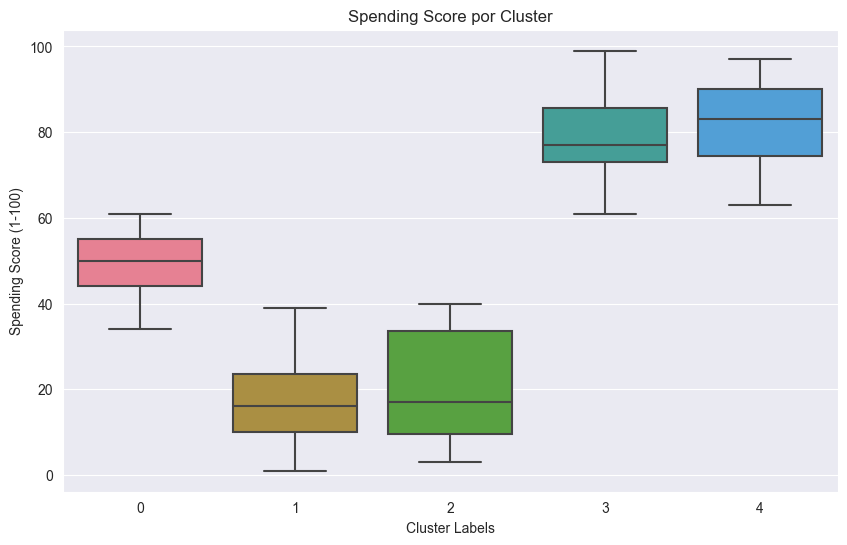

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Spending Score (1-100)")
plt.title('Spending Score por Cluster')
plt.show()

%%<br>
Boxplot de 'Age' por Cluster

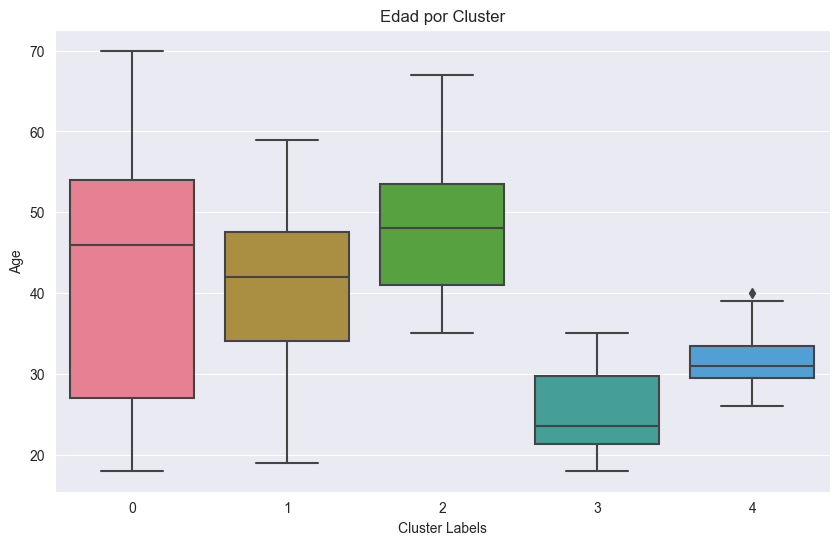

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Age")
plt.title('Edad por Cluster')
plt.show()

%%<br>
Primeras filas del resultado del clustering

In [31]:
print(cluster_results.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Loan Ammount  \
0      0   40                  15                      39          1200   
1      0   21                  15                      81          1100   
2      1   43                  16                       6          1200   
3      1   23                  16                      77          1300   
4      1   50                  17                      40          1400   

       LoanID  Device  Location  Cluster  Cluster Labels  
0  13e3dfdf97       0         0        2               2  
1  0880726ca9       0         0        3               3  
2  b3e95e003a       0         0        2               2  
3  6da587e76a       0         0        3               3  
4  d57fa9d372       0         0        2               2  


%%<br>
Gráfico de dispersión por clusters utilizando FacetGrid

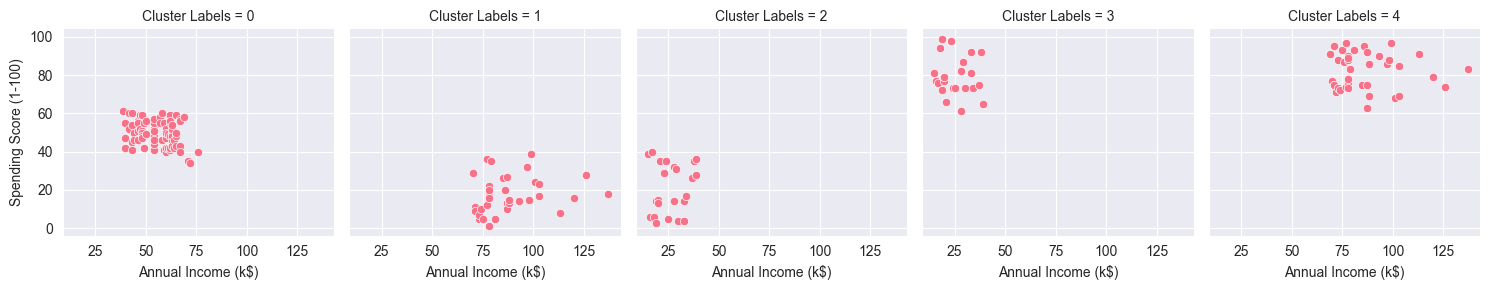

In [32]:
facet = sns.FacetGrid(cluster_results, col="Cluster Labels")
facet.map(sns.scatterplot, "Annual Income (k$)", "Spending Score (1-100)")
plt.show()

%%<br>
Agrupación por Cluster y cálculo de correlaciones

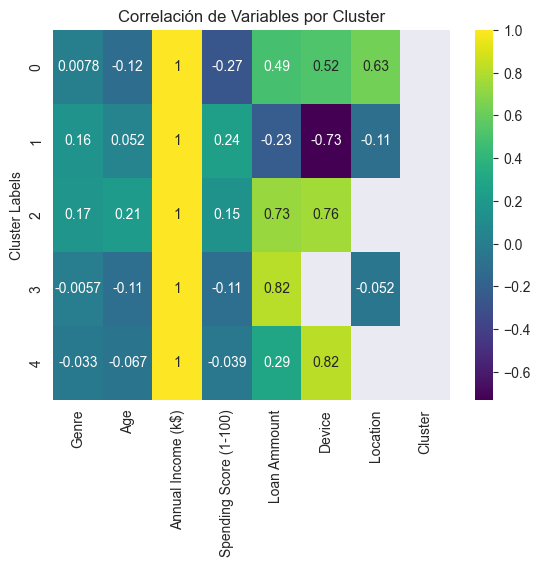

In [33]:
cluster_bygroups = cluster_results.select_dtypes(include=['int', 'float']).groupby("Cluster Labels")
heatmap_data = cluster_bygroups.corr()
heatmap_data = heatmap_data.xs('Annual Income (k$)', level=1)
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='viridis')
heatmap.set_title('Correlación de Variables por Cluster')
plt.ylabel('Cluster Labels')
plt.show()

%%<br>
Gráfico de distribución de 'Loan Ammount' por Cluster

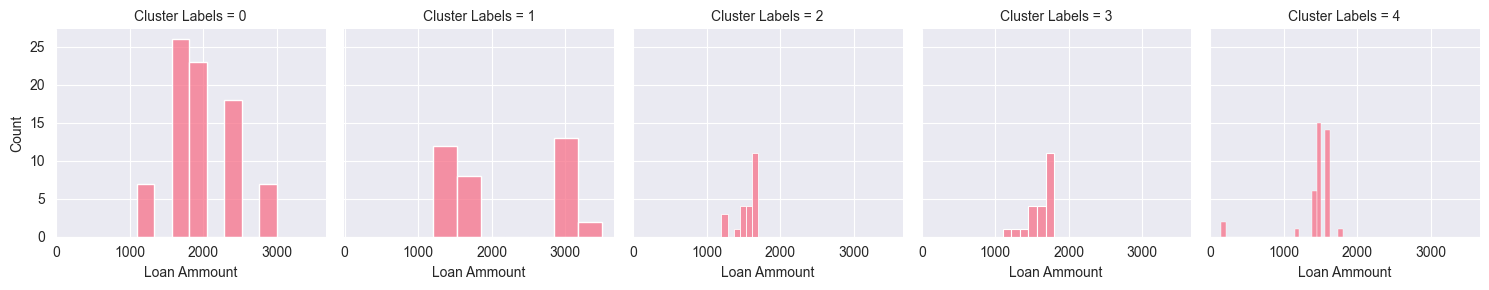

In [34]:
facet = sns.FacetGrid(cluster_results, col="Cluster Labels")
facet.map(sns.histplot, "Loan Ammount")
plt.show()

%%<br>
Conteo de valores categóricos

%%<br>
Resumen estadístico por Cluster

In [44]:
summarize = cluster_bygroups.agg(
    count=('Loan Ammount','count'),
    loan_ammount_sum=('Loan Ammount','sum'),
    median_age=('Age','median'),
    median_loan=('Loan Ammount', 'median'),
    median_annual_income=('Annual Income (k$)','median')
)
summarize["loan_pct"] = (summarize["loan_ammount_sum"] / summarize["loan_ammount_sum"].sum()) * 100
summarize["payment_ratio"] = (summarize["median_loan"] / (summarize["median_annual_income"] * 1000 / 12)) * 100
summarize = summarize.sort_values(by=["loan_pct","median_annual_income"], ascending=False)
summarize

,count,loan_ammount_sum,median_age,median_loan,median_annual_income,loan_pct,payment_ratio
Cluster Labels,,,,,,,
0,81,164700,46.0,1900.0,54.0,44.950873,42.222222
1,35,74000,42.0,1700.0,85.0,20.196507,24.000000
4,39,56600,31.0,1500.0,79.0,15.447598,22.784810
2,23,36100,48.0,1600.0,25.0,9.852620,76.800000
3,22,35000,23.5,1650.0,24.5,9.552402,80.816327


## 4. Desarrollo de Recomendaciones (Trabajo Individual)<br>
<br>
Cada miembro del equipo debe desarrollar al menos una recomendación de negocio específica para un cluster asignado. A continuación, se muestra un ejemplo de cómo estructurar las recomendaciones.<br>
<br>
### Recomendación para el Cluster 0<br>
<br>
%%<br>
Filtrar datos para el Cluster 0

In [46]:
df_ideal = cluster_results[cluster_results["Cluster Labels"] == 0]
df_ideal.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Loan Ammount,Device,Location,Cluster,Cluster Labels
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.0
mean,0.592593,42.716049,55.296296,49.518519,2033.333333,0.728395,0.753086,0.0,0.0
std,0.494413,16.447822,8.988109,6.530909,466.100847,0.447559,0.433903,0.0,0.0
min,0.000000,18.000000,39.000000,34.000000,1100.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,27.000000,48.000000,44.000000,1800.000000,0.000000,1.000000,0.0,0.0
50%,1.000000,46.000000,54.000000,50.000000,1900.000000,1.000000,1.000000,0.0,0.0
75%,1.000000,54.000000,62.000000,55.000000,2500.000000,1.000000,1.000000,0.0,0.0
max,1.000000,70.000000,76.000000,61.000000,3000.000000,1.000000,1.000000,0.0,0.0


%%<br>
Análisis de variables categóricas en el Cluster 0

%%<br>
Gráfico de barras agrupado por Género, Dispositivo y Ubicación

<Figure size 1000x500 with 0 Axes>

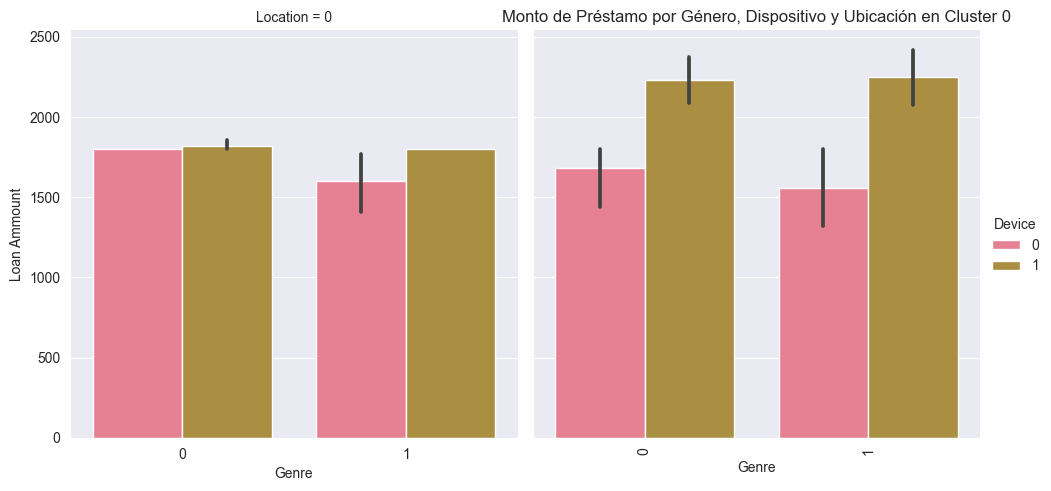

In [48]:
plt.figure(figsize=(10,5))
sns.catplot(data=df_ideal,
            x="Genre",
            y="Loan Ammount",
            hue="Device",
            col="Location",
            kind="bar")
plt.xticks(rotation=90)
plt.title('Monto de Préstamo por Género, Dispositivo y Ubicación en Cluster 0')
plt.show()

%%<br>
FacetGrid para Edad y Dispositivo por Género y Ubicación

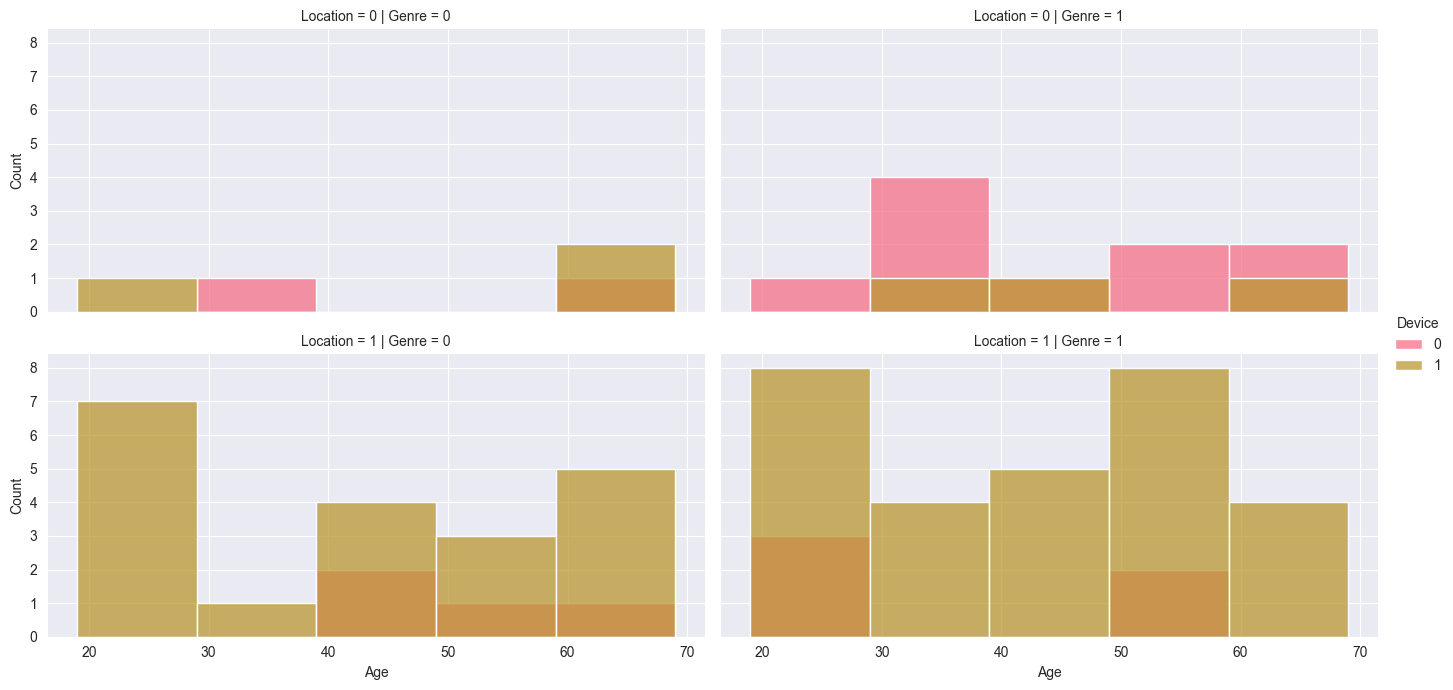

In [49]:
facet = sns.FacetGrid(df_ideal, col="Genre", row="Location", hue="Device", height=3.5, aspect=2)
facet.map(sns.histplot, "Age", binwidth=10, binrange=(19, 60))
facet.add_legend()
plt.show()

%%<br>
FacetGrid para Monto de Préstamo por Género y Ubicación

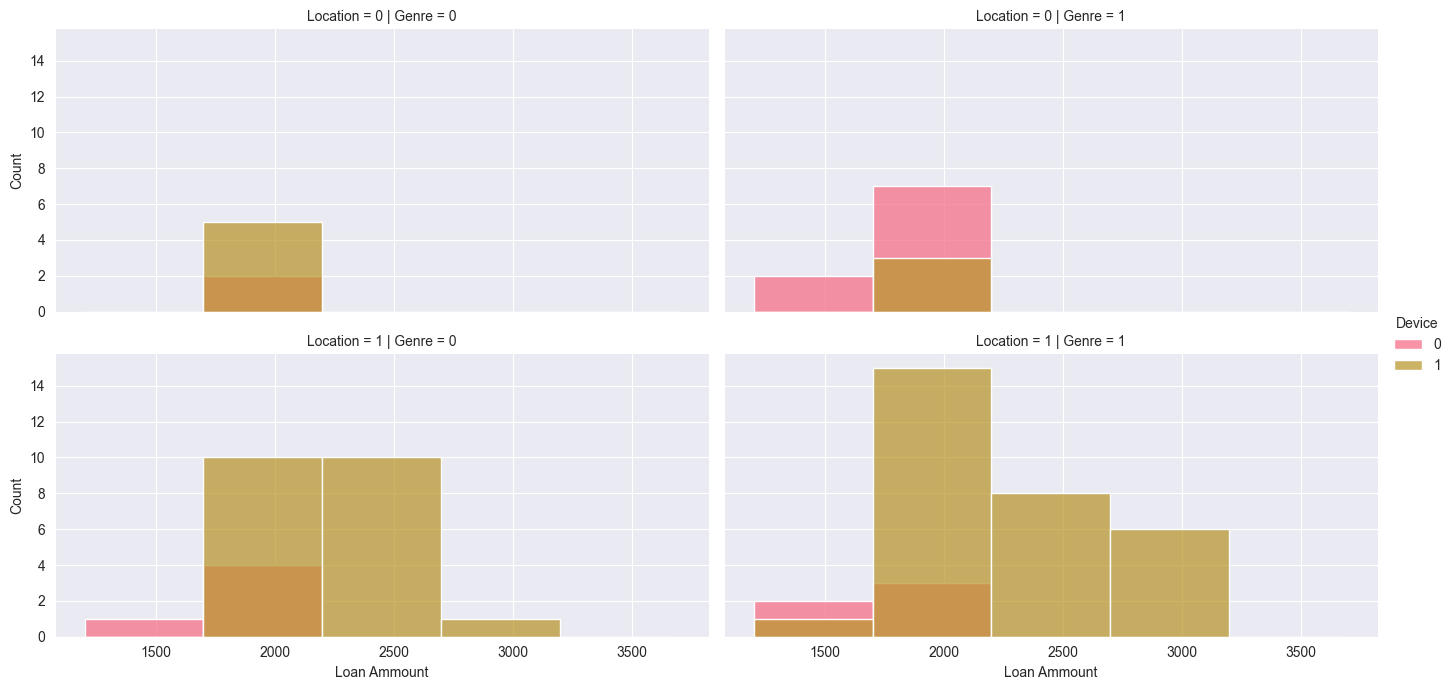

In [50]:
facet = sns.FacetGrid(df_ideal, col="Genre", row="Location", hue="Device", height=3.5, aspect=2)
facet.map(sns.histplot, "Loan Ammount", binwidth=500, binrange=(1200, 3500))
facet.add_legend()
plt.show()

%%<br>
Mediana del Monto de Préstamo en el Cluster 0

In [51]:
print("Mediana del Monto de Préstamo en Cluster 0:", df_ideal["Loan Ammount"].median())

Mediana del Monto de Préstamo en Cluster 0: 1900.0


In [ ]:
print(scipy.stats.shapiro(cluster_results["Loan Ammount Norm"]))

%%<br>
KDE plot del Monto de Préstamo por Género en el Cluster 0

In [ ]:
sns.displot(data=df_ideal, x="Loan Ammount", hue="Genre", kind="kde")
plt.title('Distribución KDE del Monto de Préstamo por Género en Cluster 0')
plt.show()

%%<br>
Selección de Monto de Préstamo para Género Masculino y Femenino en el Cluster 0

In [ ]:
male_loans = df_ideal[df_ideal["Genre"] == "Male"]["Loan Ammount"]
female_loans = df_ideal[df_ideal["Genre"] == "Female"]["Loan Ammount"]

%%

In [ ]:
from scipy.stats import mannwhitneyu

%%<br>
Prueba de Mann-Whitney para comparar Monto de Préstamo entre Géneros

In [ ]:
result = mannwhitneyu(male_loans, female_loans)
print(result)

%% [markdown]<br>
**Interpretación:** Se rechaza la hipótesis nula. Los grupos son significativamente diferentes.<br>
<br>
%%<br>
Descripción agrupada por Género en el Cluster 0

In [ ]:
print(df_ideal.groupby("Genre").describe().T)

%%<br>
Gráfico de dispersión con tamaño de punto basado en Monto de Préstamo y color por Género

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_ideal,
                x="Annual Income (k$)",
                y="Spending Score (1-100)",
                size="Loan Ammount",
                hue="Genre",
                palette='viridis')
plt.axhline(df_ideal["Spending Score (1-100)"].median(), color='red', linestyle='--')
plt.title('Dispersión de Ingreso Anual vs Spending Score en Cluster 0')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

%% [markdown]<br>
## Revisión de la Implementación de K-means<br>
<br>
La implementación de K-means realizada utiliza la biblioteca `scikit-learn`, lo cual es adecuado para este tipo de análisis. Sin embargo, hay algunos aspectos que se deben considerar para asegurar que el clustering sea efectivo:<br>
<br>
### 1. Escalado de Características<br>
<br>
Es esencial escalar las características antes de aplicar K-means, ya que el algoritmo se basa en distancias euclidianas y las diferencias en las escalas pueden sesgar los resultados. En la implementación proporcionada, se ha añadido el escalado utilizando `StandardScaler`.<br>
<br>
### 2. Selección del Número de Clusters<br>
<br>
Actualmente, se ha fijado el número de clusters en 5. Sin embargo, es recomendable determinar el número óptimo de clusters utilizando métodos como el **Elbow Method** o el **Silhouette Score**. A continuación, se muestra cómo implementar el Elbow Method:<br>
<br>
%%

In [ ]:
from sklearn.metrics import silhouette_score

%%<br>
Determinar el número óptimo de clusters utilizando el Elbow Method

In [ ]:
sse = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

%%<br>
Gráfico del Elbow Method

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Elbow Method Para Determinar el Número Óptimo de Clusters')
plt.show()

%%<br>
Gráfico del Silhouette Score

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Para Determinar el Número Óptimo de Clusters')
plt.show()

%% [markdown]<br>
**Interpretación:** Basado en los gráficos, seleccionamos el número de clusters que muestra una disminución significativa en el SSE (Elbow Method) y un alto Silhouette Score. Por ejemplo, si el codo se observa en k=5 y el Silhouette Score es alto, entonces k=5 es una buena elección.<br>
<br>
### 3. Validación de los Clusters<br>
<br>
Además de la visualización, es importante interpretar las características de cada cluster para asegurar que sean significativas y útiles para las estrategias de negocio.<br>
<br>
## Conclusión<br>
<br>
La implementación de K-means es adecuada, pero siempre es recomendable validar y ajustar los parámetros según los datos específicos para obtener resultados óptimos.

```

**¡Buena suerte con tu tarea! Si necesitas más ayuda, no dudes en preguntar.**